### Importando as bibliotecas

In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick
from google.colab import files

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')


Versão do pandas: 2.2.2
Versão do numpy: 1.26.4
Versão do scikit-learn (sklearn): 1.5.2
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


# Explorando os dados

### Entendendo os conjuntos de dados

In [5]:
# Carregando o arquivo e imprimindo as 5 primeiras linhas
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [6]:
# Para verificar quantas amostras tem, basta printas as útlimas 5 linhas (71174)
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [7]:
# Visualizar a quantidade de colunas
dados.shape

(71175, 11)

In [8]:
# Obter informações descritivas (média, valor máximo e mínimo, etc)
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [9]:
# Informações descritivas para variáveis categóricas
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Visualizações gráficas dos dados

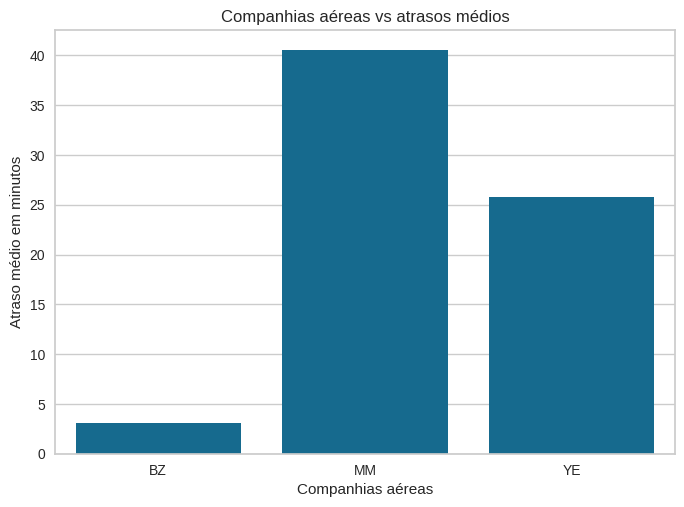

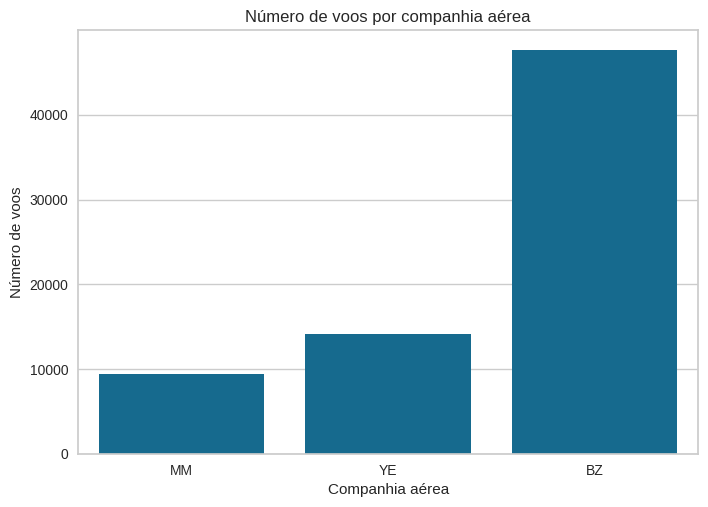

In [11]:
# Calcula a média de atrasos para cada companhia aérea e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('airline')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por companhia aérea | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico: Número de voos por companhia aérea | O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

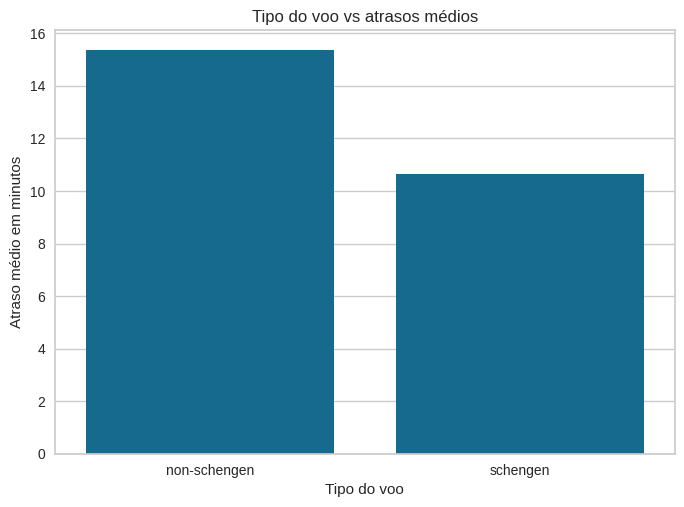

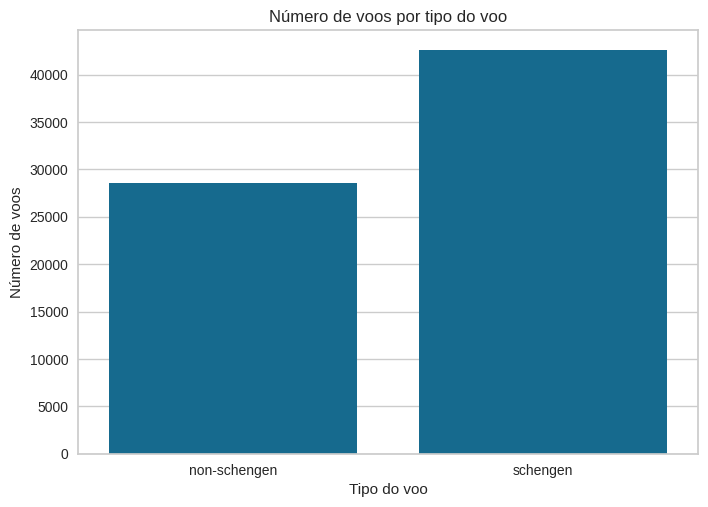

In [12]:
# Analisar se o tipo do voo tem algum impacto na média dos atrasos
# Calcula a média de atrasos para o tipo 'schengen' e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por tipo de voo | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='schengen', y='delay',data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

# Gráfico: Número de voos por tipo de voo | O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

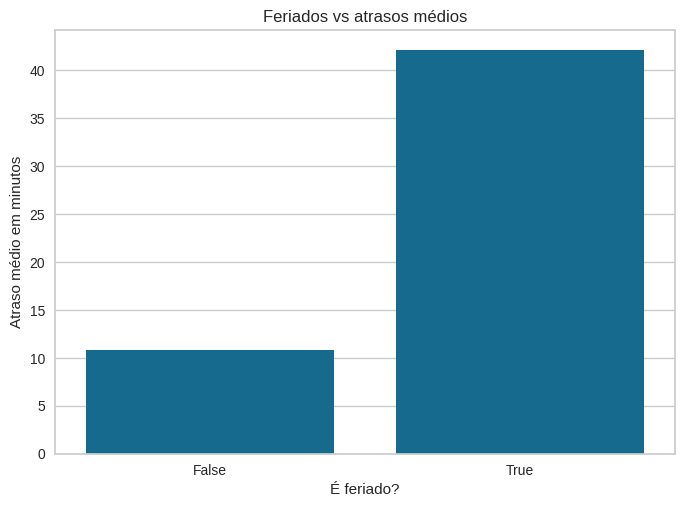

In [13]:
# Analisar se os atrasos em feriados são maiores ou menores do que em dias não feriados.

# Calcula a média de atrasos para dias de feriado e não feriado e cria um novo DataFrame com esses valores utilizando o método (.reset_index())
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()

# Gráfico: Atrasos médios por dia de feriado | (sns.barplot()) é utilizado para criar gráficos de barras)
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriados vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()


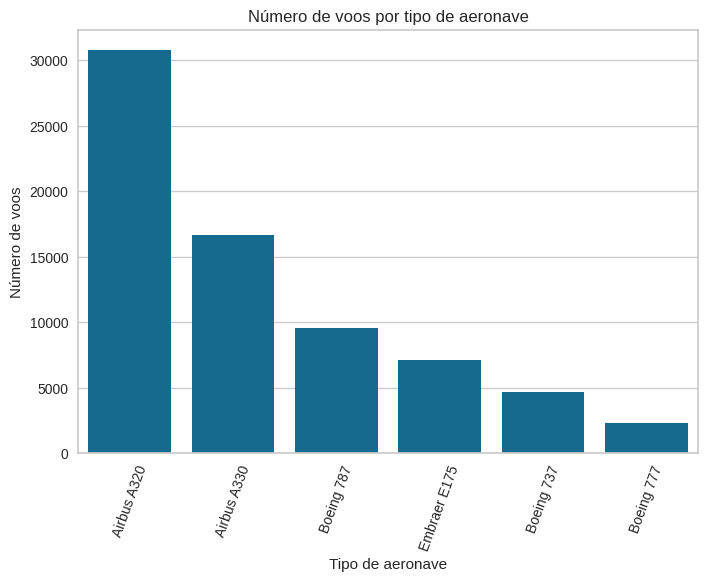

In [14]:
# Analisar qual o tipo de avião existe em maior quantidade no conjunto de dados

# Criar uma ordem
order = dados['aircraft_type'].value_counts().index

# Gráfico: Número de voos por tipo de avião| O método (sns.countplot()) é usado para criar gráficos de contagem
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de voos')
plt.show()

### Analisando a distribuição dos dados

#### Como encontrar a largura de bin ideal?

**Regra de Freedman-Diaconis**

Ela determina a largura do bin, que é igual a 2 vezes o intervalo interquartil dividido pela raiz cúbica do número de observações.

[Freedman-Diaconis rule - Wikipedia](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)


In [15]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

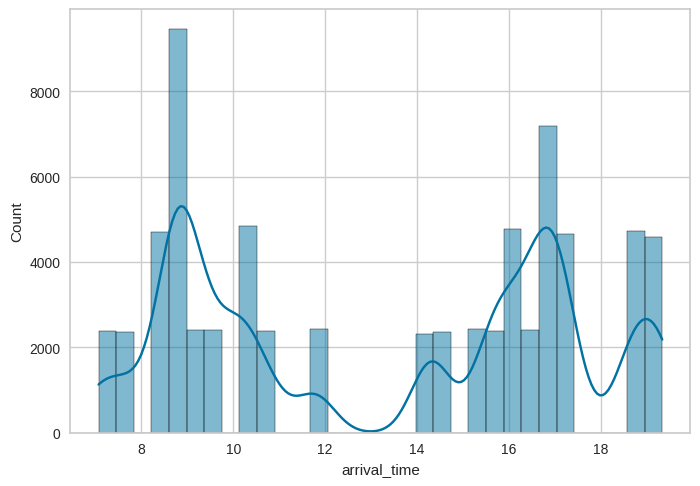

In [16]:
# Histograma: ferramenta de visualização de dados que mostra a distribuição de uma variável numérica

# Arrival time
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

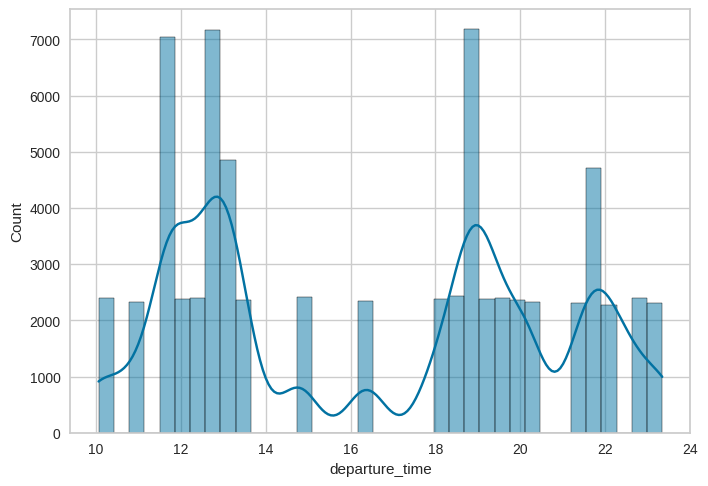

In [17]:
# Departure time

# Remove valores ausentes
dados = dados.dropna(subset=['departure_time'])

largura_bin_dt = calcular_largura_bin(dados, 'departure_time')
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

#### O objetivo do boxplot
O **boxplot**, também conhecido como **diagrama de caixa**, é uma representação gráfica que nos permite visualizar a distribuição dos dados de uma forma mais clara e objetiva.

Ele é composto por:
- um retângulo que representa a mediana e os quartis dos dados
- linhas que se estendem para fora do retângulo, que mostram a amplitude dos dados

Onde:
- limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier). Ele é calculado como Q1 - 1,5 x IQR (onde IQR é a amplitude interquartil, ou seja, a diferença entre o terceiro quartil e o primeiro quartil).
- O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.
- A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.
- O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

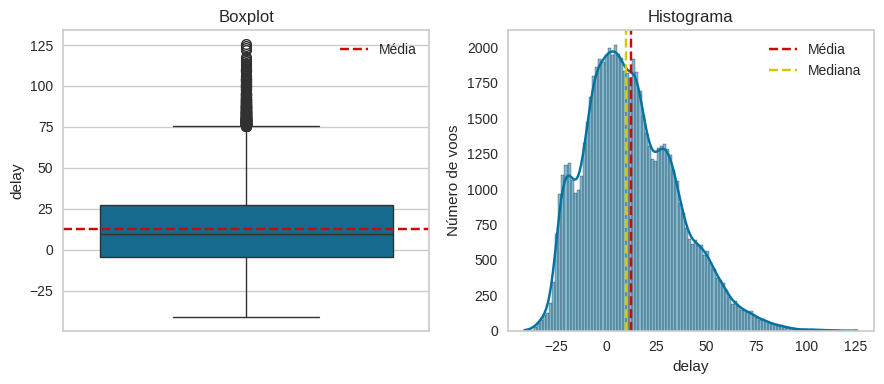

In [18]:
# Histogram de 'delay'
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## Feature Engineering

### **O que são features?**
Features são as **variáveis** ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações. Elas representam as informações que o modelo tem à sua disposição para aprender padrões nos dados.  

Por exemplo, se estivermos construindo um modelo para prever o preço de uma casa, as features podem incluir:
- **Número de quartos**
- **Metragem quadrada**
- **Localização geográfica**
- **Proximidade de escolas**, entre outras.  


---


### **A importância do Feature Engineering**  
- **Melhora o desempenho do modelo**: Escolher as features certas e transformá-las adequadamente pode resultar em modelos mais precisos e eficientes. Features bem projetadas podem capturar informações relevantes e eliminar ruído nos dados.
  
- **Reduz a dimensionalidade**: Em datasets com muitas features, a dimensionalidade dos dados pode se tornar um problema. O feature engineering pode ajudar a reduzir a quantidade de features, mantendo apenas aquelas que são realmente informativas para o modelo.


---


### **Técnicas de Feature Engineering**
Existem várias técnicas de feature engineering, incluindo:

1. **Criação de features**  
   Envolve a criação de novas features com base nas existentes.  
   - Exemplo: Combinar a **metragem** e o **valor** de um imóvel para criar uma nova feature chamada **valor por metro quadrado**.
   - Outro exemplo: Com dados de **data e hora**, pode-se criar uma nova característica representando o **dia da semana**, que pode capturar padrões específicos.

2. **Transformação de features**  
   Aplicar funções matemáticas às features existentes para torná-las mais adequadas para o modelo.
   - Exemplos: Aplicar **logaritmos** ou **escalonar valores** para ajustar a escala dos dados.

3. **Seleção de features**  
   Nem todas as features são igualmente importantes. A seleção de features identifica e mantém apenas as mais relevantes para o problema em questão.

---  


In [19]:
# Adicionando uma nova coula à tabela de dados
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


#### Verificar se é final de semana

Para isso é só usar a declaração do método

 - `pandas.Series.dt.weekday`


O `pandas.Series` está referenciando a _series_, que no caso é `dados['date']`

 Colocar `.isin([5, 6])`. Se o valor retornado for cinco ou seis, ou seja, sábado e domingo, será `True`, do contrário, será `False`.

In [20]:
# Verificar se é um final de semana ou não, ou seja, se é um cinco ou seis
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [21]:
# Verificar qual o nome do dia
dados['dayname'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,dayname
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


## Feature Enconding

In [22]:
# Identificar variáveis categóricas
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


#### Trabalhando com categóricas binárias

In [23]:
# Identificando quais sãos os valores binários de especificas variáveis
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [24]:
dados['is_holiday'].unique()

array([False,  True])

In [25]:
dados['is_weekend'].unique()

array([False,  True])

In [26]:
# Para um melhor ambiente de trabalho, transformar os valores em forma de string para 0 e 1
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

<ipython-input-26-386d1f8d26d9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
<ipython-input-26-386d1f8d26d9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
<ipython-input-26-386d1f8d26d9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,dayname
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


#### Trabalhando com váriaveis que tem mais de duas categorias

`airline`, com 3 valores;

`aircraft_type`, com 6 valores;

`origin`, com 10 valores;

`day_name`, com 7 valores.

In [27]:
# Criando uma lista com essas váriaveis
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'dayname']

O método `pd.get_dummies()` do Pandas, cria novas colunas binárias com zeros e uns, indicando a presença ou ausência do valor de uma coluna.

https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher

In [28]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Várias colunas foram criadas, por exemplo, `origin_TCY`, `origin_TZF`.
- A primeira amostra possui o valor `TCY` na coluna `origin`.

- A `day_name_Friday` possui valor 1. Significa que tinha o valor "friday" na coluna `day_name`. Essa análise vale para as outras colunas que foram criadas.

Agora, é necessário atribuir esse código a outro dataframe que chamaremos de `df_encoded`.

### Limpando os dados



#### **Análise de correlação**
A **análise de correlação** nos retorna um índice que varia de -1 a 1, onde -1 indica uma **correlação negativa perfeita** e significa que se uma variável <u> cresce, a outra decresce </u> na mesma proporção, ou seja, <u>são inversas.</u>

Já o 1 indica uma **correlação positiva perfeita**, que mostra que se uma variável <u> cresce, a outra cresce na mesma proporção, ou se uma variável decresce, a outra decresce na mesma proporção.</u> Então, vamos fazer essa análise para essas duas variáveis!

In [29]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Isso indica que a correlação está muito próxima de ser uma **positiva perfeita.**

E isso dá a informação de que as duas colunas transmitem praticamente a mesma informação, então não faz sentido ter as duas.

In [32]:
# Excluindo colunas desnecessarias para as analises futuras
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,dayname_Friday,dayname_Monday,dayname_Saturday,dayname_Sunday,dayname_Thursday,dayname_Tuesday,dayname_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
